<a href="https://colab.research.google.com/github/jamesharrison2005/Analysis-on-the-Prevalence-of-Covid-19/blob/main/Growth_and_prevalence_of_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The objective of this project is to *analyse* how COVID-19 spread across countries over time, identify periods of rapid growth, compare prevalence and mortality rates, and uncover regional differences.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/owid-covid-data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning
Converting date feature into datetime

In [16]:
df['date'] = pd.to_datetime(df['date'])
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    350085 non-null  object        
 1   continent                                   333420 non-null  object        
 2   location                                    350085 non-null  object        
 3   date                                        350085 non-null  datetime64[ns]
 4   total_cases                                 312088 non-null  float64       
 5   new_cases                                   340457 non-null  float64       
 6   new_cases_smoothed                          339198 non-null  float64       
 7   total_deaths                                290501 non-null  float64       
 8   new_deaths                                  340511 non-null  float64      

In [18]:
df.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,350085,3.120880e+05,3.404570e+05,3.391980e+05,2.905010e+05,340511.000000,339281.000000,312088.000000,340457.000000,339198.000000,...,200889.000000,132973.000000,239669.000000,322072.000000,263138.000000,3.500850e+05,1.218400e+04,12184.000000,12184.000000,12184.000000
mean,2021-11-25 18:35:40.040275712,6.683354e+06,9.601634e+03,9.637066e+03,8.602180e+04,85.511055,85.817071,101749.851259,145.163814,145.696924,...,32.909483,50.789962,3.097245,73.713631,0.722464,1.284633e+08,5.281637e+04,9.738648,11.345256,1669.025575
min,2020-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,2020-12-16 00:00:00,8.090000e+03,0.000000e+00,2.860000e-01,1.270000e+02,0.000000,0.000000,2595.577500,0.000000,0.044000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.202250e+02,1.400000,-1.600000,72.395046
50%,2021-11-26 00:00:00,7.020500e+04,2.000000e+00,2.485700e+01,1.328000e+03,0.000000,0.143000,28307.659000,0.128000,6.517000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.885850e+03,8.075000,5.720000,1105.404700
75%,2022-11-06 00:00:00,7.409558e+05,2.640000e+02,4.978570e+02,1.192200e+04,3.000000,5.143000,133506.244000,35.466000,82.411000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.742344e+04,15.360000,16.302500,2740.130200
max,2023-10-24 00:00:00,7.714071e+08,8.401961e+06,6.402036e+06,6.972139e+06,27939.000000,14822.000000,737554.506000,228872.025000,37241.781000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.289776e+06,76.620000,377.630000,10292.916000
std,NaN,4.068903e+07,1.102769e+05,9.447784e+04,4.398873e+05,613.687971,559.130004,151265.689121,1163.714678,599.957847,...,13.573767,31.956100,2.548327,7.395220,0.148976,6.607694e+08,1.492195e+05,12.304441,25.181297,1938.556228


Gaining an understanding of the unique values in each column, as well as identifying any data that may need to be cleaned. Data is already sorted by location and date so sorting is unecessary. Undefined data is already replaced using NaN.

In [19]:
null_mask = df.isnull().any(axis=1)
null_data = df[null_mask]
null_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350080,ZWE,Africa,Zimbabwe,2023-10-14,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350081,ZWE,Africa,Zimbabwe,2023-10-15,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350082,ZWE,Africa,Zimbabwe,2023-10-16,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350083,ZWE,Africa,Zimbabwe,2023-10-17,265808.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Checking if each population has a single population value

In [20]:
population_counts = df.groupby('location')['population'].nunique()
countries_with_multiple_populations = population_counts[population_counts > 1]

if not countries_with_multiple_populations.empty:
    print("Countries with multiple population values:")
    print(countries_with_multiple_populations)
else:
    print("Each country has a single population value.")

Each country has a single population value.


## New Creating new metrics

cases per 100k, deaths per 100k

In [21]:
df['cases_per_100k'] = (df['total_cases'] / df['population']) * 100000
df['deaths_per_100k'] = (df['total_deaths'] / df['population']) * 1000


creating 7-day rolling averages

In [22]:
df_sorted = df.sort_values(by=['location', 'date'])
df['new_cases_rolling_avg'] = df_sorted.groupby('location')['new_cases'].rolling(window=7).mean().reset_index(level=0, drop=True)
df['new_deaths_rolling_avg'] = df_sorted.groupby('location')['new_deaths'].rolling(window=7).mean().reset_index(level=0, drop=True)

print(df[['location', 'date', 'new_cases', 'new_deaths', 'new_cases_rolling_avg', 'new_deaths_rolling_avg']].head(5))

      location       date  new_cases  new_deaths  new_cases_rolling_avg  \
0  Afghanistan 2020-01-03        0.0         0.0                    NaN   
1  Afghanistan 2020-01-04        0.0         0.0                    NaN   
2  Afghanistan 2020-01-05        0.0         0.0                    NaN   
3  Afghanistan 2020-01-06        0.0         0.0                    NaN   
4  Afghanistan 2020-01-07        0.0         0.0                    NaN   

   new_deaths_rolling_avg  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  


daily growth metric as a percentage

In [23]:

df['previous_day_total_cases'] = df_sorted.groupby('location')['total_cases'].shift(1)
df['daily_growth_rate'] = (df['new_cases'] / df['previous_day_total_cases']) * 100

print(df[['location', 'date', 'new_cases', 'total_cases', 'previous_day_total_cases', 'daily_growth_rate']])

           location       date  new_cases  total_cases  \
0       Afghanistan 2020-01-03        0.0          NaN   
1       Afghanistan 2020-01-04        0.0          NaN   
2       Afghanistan 2020-01-05        0.0          NaN   
3       Afghanistan 2020-01-06        0.0          NaN   
4       Afghanistan 2020-01-07        0.0          NaN   
...             ...        ...        ...          ...   
350080     Zimbabwe 2023-10-14        0.0     265808.0   
350081     Zimbabwe 2023-10-15        0.0     265808.0   
350082     Zimbabwe 2023-10-16        0.0     265808.0   
350083     Zimbabwe 2023-10-17        0.0     265808.0   
350084     Zimbabwe 2023-10-18        0.0     265808.0   

        previous_day_total_cases  daily_growth_rate  
0                            NaN                NaN  
1                            NaN                NaN  
2                            NaN                NaN  
3                            NaN                NaN  
4                            NaN 

Case fatality rate

In [24]:
df['case_fatality_rate'] = (df['total_deaths'] / df['total_cases']) * 100
print(df[['location', 'date', 'total_deaths', 'total_cases', 'case_fatality_rate']])

           location       date  total_deaths  total_cases  case_fatality_rate
0       Afghanistan 2020-01-03           NaN          NaN                 NaN
1       Afghanistan 2020-01-04           NaN          NaN                 NaN
2       Afghanistan 2020-01-05           NaN          NaN                 NaN
3       Afghanistan 2020-01-06           NaN          NaN                 NaN
4       Afghanistan 2020-01-07           NaN          NaN                 NaN
...             ...        ...           ...          ...                 ...
350080     Zimbabwe 2023-10-14        5718.0     265808.0            2.151177
350081     Zimbabwe 2023-10-15        5718.0     265808.0            2.151177
350082     Zimbabwe 2023-10-16        5718.0     265808.0            2.151177
350083     Zimbabwe 2023-10-17        5718.0     265808.0            2.151177
350084     Zimbabwe 2023-10-18        5718.0     265808.0            2.151177

[350085 rows x 5 columns]


In [25]:
#replace infinite
df.replace([np.inf,  -np.inf], np.nan, inplace=True)

# Data analysis
## Structure and Overview
- After creating new metrics there are 74 different features most of which are a float datatype however some are objects and one is datetime.
- The dataset includes a very large range of countries as well as all availible information on the growth ans spread of cases
- The dataset contains data from January 2020 until  October 2023. In early and late reports a lot data is Not applicable due to the decrease in prevalence

## Data Quality
 - Data quality is relatively high being sorted and consistent when addressing missing values
 - Rolling averages were created to avoid any negative values potentially caused by data revisions

## Global Trend analysis
- When does the global growth peak?
- Are there multiple waves visible?
- How do deaths compare to cases?

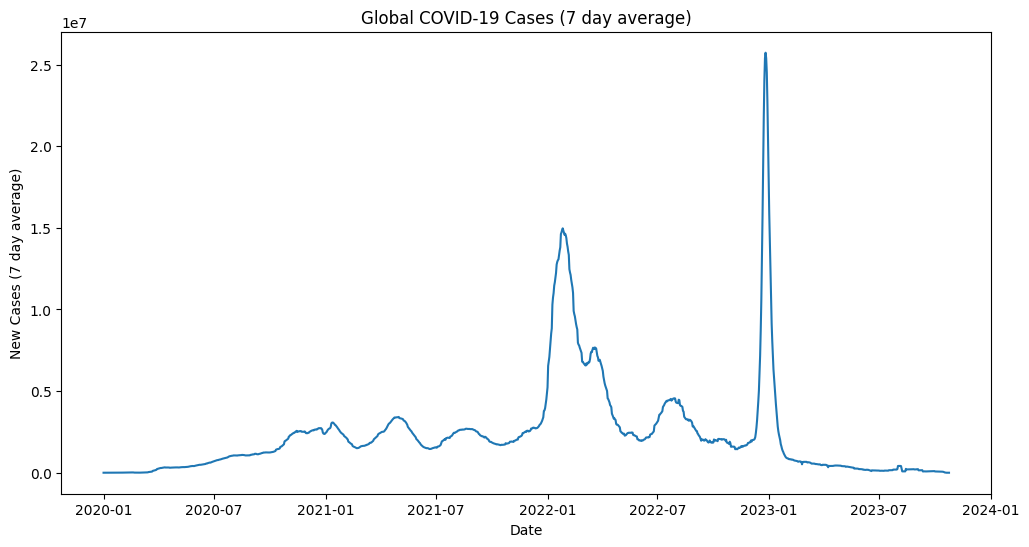

In [27]:
global_cases_by_date = df.groupby('date')['new_cases_rolling_avg'].sum()

plt.figure(figsize = (12,6))
plt.plot(global_cases_by_date)
plt.title('Global COVID-19 Cases (7 day average)')
plt.xlabel('Date')
plt.ylabel('New Cases (7 day average)')
plt.show()

From the graph we can Identify two main features that can help answer the questions we identfied earlier.

1. The global cases for COVID-19 peaked in January 2023 with 25 million cases globally
2. There are multiple waves visible demonstrating different spikes in prevalence with initial large increase in January to February of 2022 peaking at 15 million cases globally

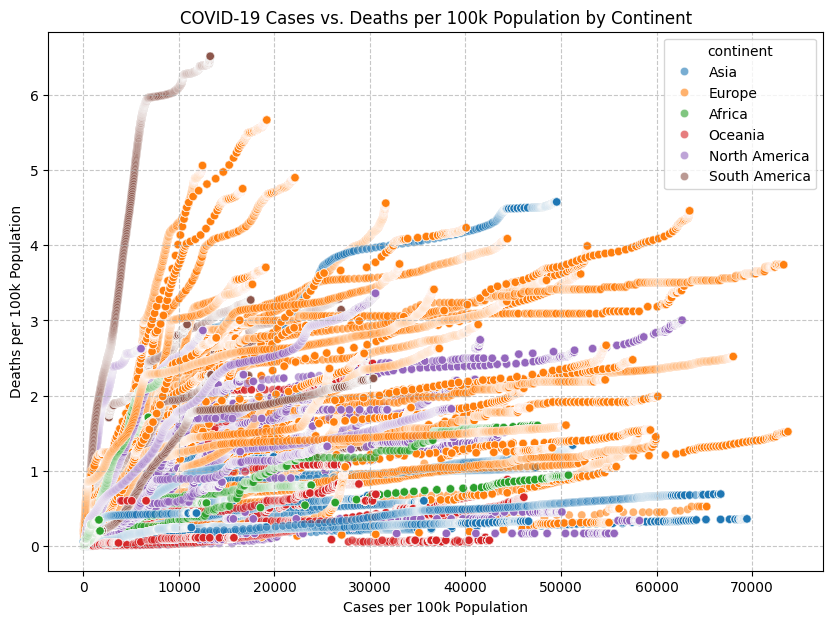

In [31]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='cases_per_100k',
    y='deaths_per_100k',
    hue='continent', # Color points by continent
    alpha=0.6
)
plt.title('COVID-19 Cases vs. Deaths per 100k Population by Continent')
plt.xlabel('Cases per 100k Population')
plt.ylabel('Deaths per 100k Population')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

I've used seaborn to create a scatterplot to measure the correlation between Deaths per 100k and cases per 100k. The data is colour coded by continent to make it easier to identify which continents experienced a higher death rate.

In [36]:
grouped_correlations = df.groupby('continent')[['cases_per_100k', 'deaths_per_100k']].corr()
correlation_by_continent = grouped_correlations.unstack().loc[:, ('cases_per_100k', 'deaths_per_100k')]

print("Pearson correlation coefficient between 'cases_per_100k' and 'deaths_per_100k' by continent:")
print(correlation_by_continent)

Pearson correlation coefficient between 'cases_per_100k' and 'deaths_per_100k' by continent:
continent
Africa           0.608905
Asia             0.528508
Europe           0.448227
North America    0.560214
Oceania          0.369680
South America    0.480174
Name: (cases_per_100k, deaths_per_100k), dtype: float64


## Analysis
The correlation analysis between 'cases\_per\_100k' and 'deaths\_per\_100k' reveals a positive correlation across all continents. Africa shows the strongest correlation at approximately 0.609, while Oceania exhibits the weakest at around 0.370. Other continents fall within this range, indicating varying degrees of relationship between case and death rates.

### Data Analysis Key Findings
*   All continents exhibit a positive Pearson correlation coefficient between 'cases\_per\_100k' and 'deaths\_per\_100k'.
*   Africa has the strongest positive correlation, with a coefficient of approximately 0.609.
*   Oceania shows the weakest positive correlation, with a coefficient of approximately 0.370.
*   North America and Asia have moderate-to-strong correlations, approximately 0.560 and 0.529, respectively.
*   Europe and South America demonstrate moderate positive correlations, around 0.448 and 0.480, respectively.

### Insight
*   The variation in correlation strength across continents suggests that other continent-specific factors (e.g., demographics, healthcare systems, testing capacities, or public health interventions) likely influence the relationship between case numbers and mortality.
*   Further analysis could explore additional factors at a country or regional level to gain further understanding.


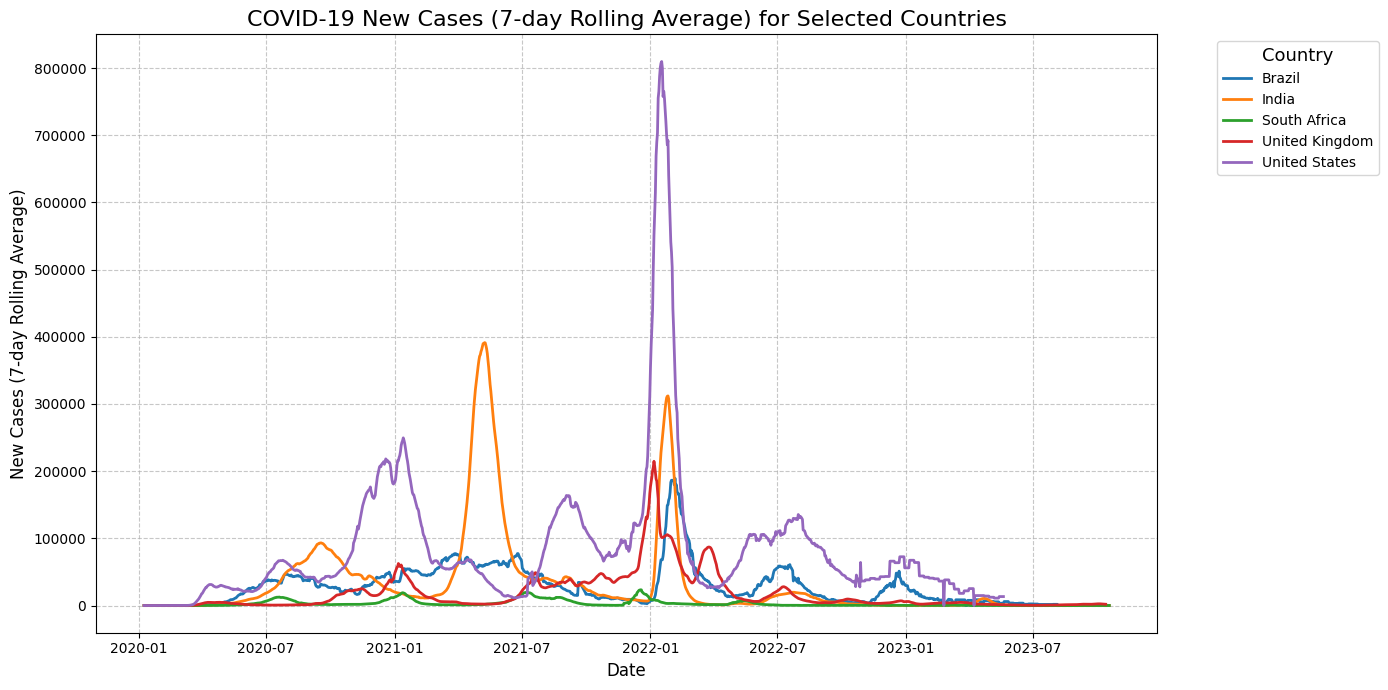

In [37]:
selected_countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'South Africa']
df_selected_countries = df[df['location'].isin(selected_countries)]

df_selected_countries = df_selected_countries.dropna(subset=['new_cases_rolling_avg'])

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_selected_countries,
    x='date',
    y='new_cases_rolling_avg',
    hue='location',
    palette='tab10',
    linewidth=2
)

plt.title('COVID-19 New Cases (7-day Rolling Average) for Selected Countries', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases (7-day Rolling Average)', fontsize=12)
plt.legend(title='Country', title_fontsize='13', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1193789870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_prevalence.index, y=top_countries_prevalence.values, palette='viridis')


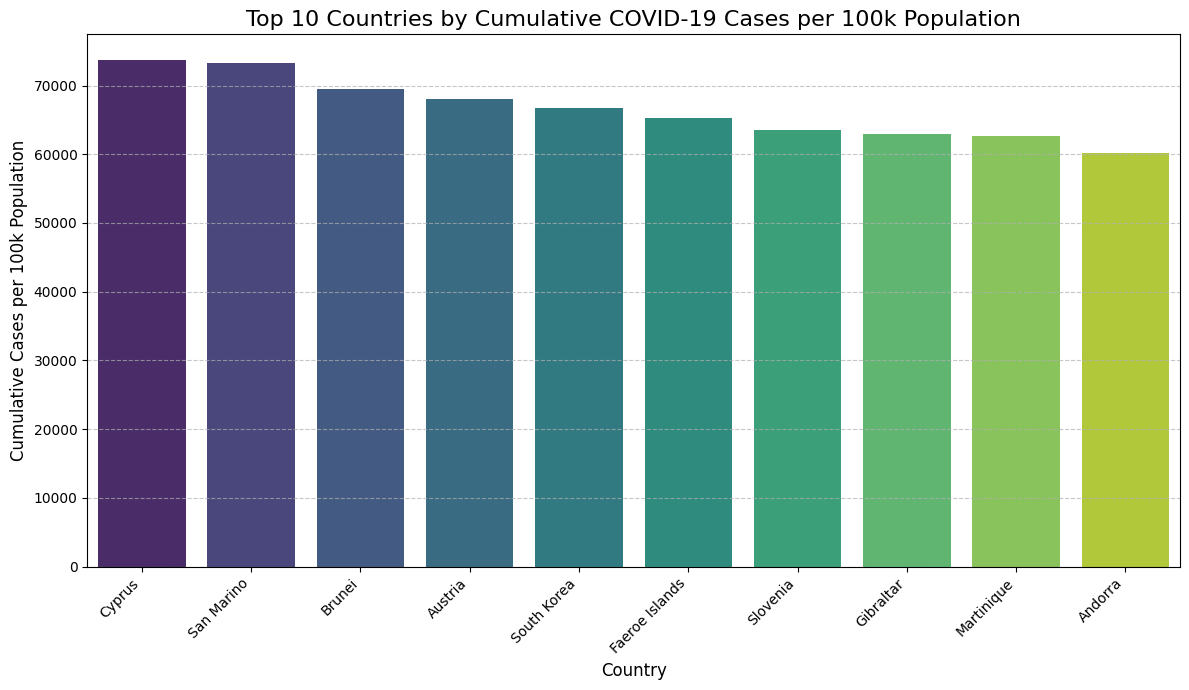

In [38]:
max_cases_per_100k = df.groupby('location')['cases_per_100k'].max().sort_values(ascending=False)

# Select the top 10 countries for visualization
top_n_countries = 10
top_countries_prevalence = max_cases_per_100k.head(top_n_countries)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries_prevalence.index, y=top_countries_prevalence.values, palette='viridis')
plt.title(f'Top {top_n_countries} Countries by Cumulative COVID-19 Cases per 100k Population', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Cumulative Cases per 100k Population', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

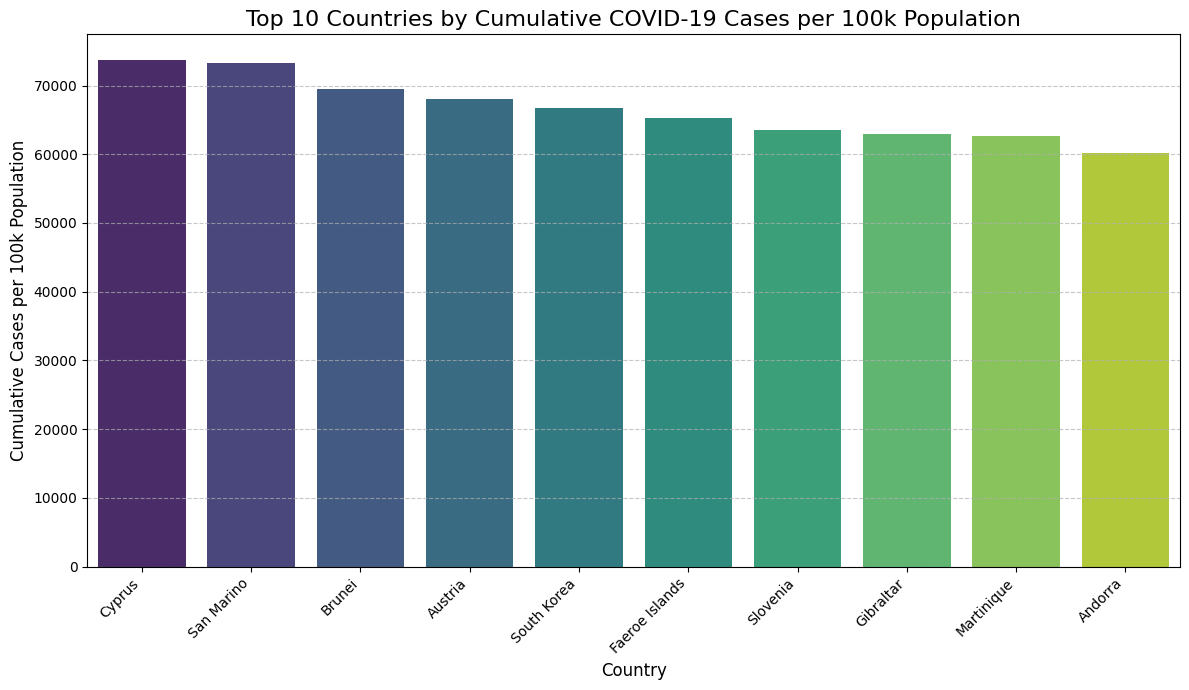

In [39]:
max_cases_per_100k = df.groupby('location')['cases_per_100k'].max().sort_values(ascending=False)

# Select the top 10 countries for visualization
top_n_countries = 10
top_countries_prevalence = max_cases_per_100k.head(top_n_countries)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries_prevalence.index, y=top_countries_prevalence.values, hue=top_countries_prevalence.index, palette='viridis', legend=False)
plt.title(f'Top {top_n_countries} Countries by Cumulative COVID-19 Cases per 100k Population', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Cumulative Cases per 100k Population', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

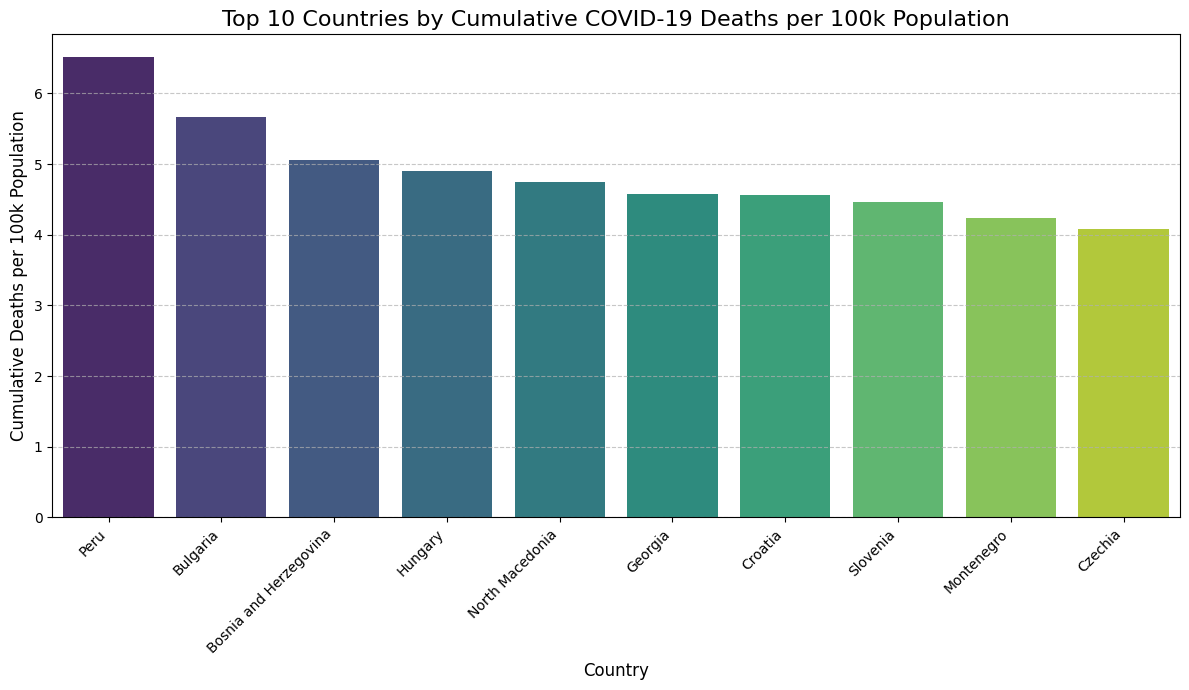

In [40]:
max_deaths_per_100k = df.groupby('location')['deaths_per_100k'].max().sort_values(ascending=False)

# Select the top 10 countries for visualization
top_n_countries = 10
top_countries_mortality = max_deaths_per_100k.head(top_n_countries)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries_mortality.index, y=top_countries_mortality.values, hue=top_countries_mortality.index, palette='viridis', legend=False)
plt.title(f'Top {top_n_countries} Countries by Cumulative COVID-19 Deaths per 100k Population', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Cumulative Deaths per 100k Population', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analysis of Countries with Highest COVID-19 Mortality

The bar chart titled 'Top 10 Countries by Cumulative COVID-19 Deaths per 100k Population' effectively visualizes the countries that experienced the highest mortality rates relative to their population.

**Key Observations:**

*   **High Mortality:** Countries like Peru, Bulgaria, and Bosnia and Herzegovina show significantly higher cumulative deaths per 100k population compared to others on the list. This indicates a disproportionately high impact of COVID-19 mortality in these nations.
*   **Geographic Distribution:** The top 10 list includes countries from various regions, though a notable concentration appears in Eastern Europe (Bulgaria, Bosnia and Herzegovina, Hungary, North Macedonia, Georgia, Croatia, Slovenia, Montenegro, Czechia) and one country from South America (Peru).
*   **Magnitude of Deaths:** The values on the y-axis, representing cumulative deaths per 100k population, highlight the severe burden these countries faced. For instance, Peru's figure is considerably higher than other nations, suggesting a particularly severe health crisis there.

This visualization successfully identifies and ranks countries based on their cumulative COVID-19 death rates per 100k population, allowing for a clear comparison of mortality impact.

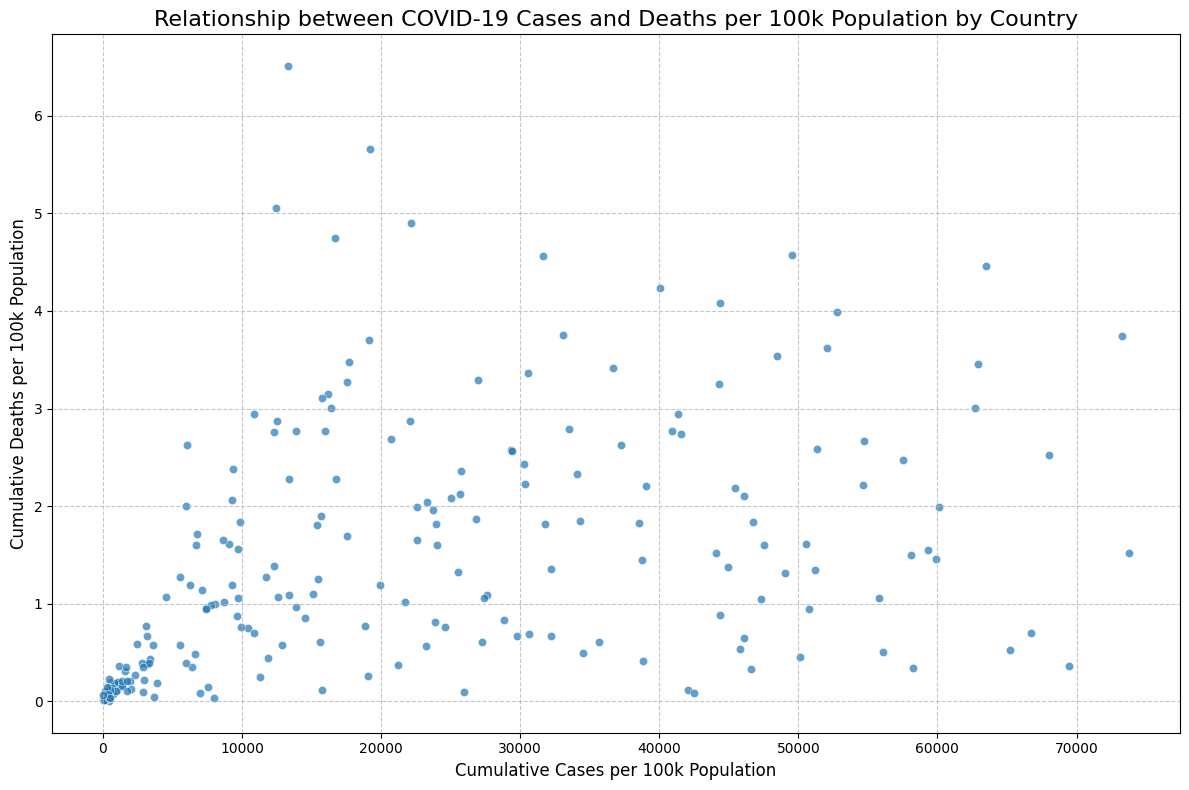

In [41]:
country_prevalence_mortality = df.groupby('location')[['cases_per_100k', 'deaths_per_100k']].max().reset_index()
country_prevalence_mortality.dropna(subset=['cases_per_100k', 'deaths_per_100k'], inplace=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=country_prevalence_mortality,
    x='cases_per_100k',
    y='deaths_per_100k',
    alpha=0.7
)
plt.title('Relationship between COVID-19 Cases and Deaths per 100k Population by Country', fontsize=16)
plt.xlabel('Cumulative Cases per 100k Population', fontsize=12)
plt.ylabel('Cumulative Deaths per 100k Population', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

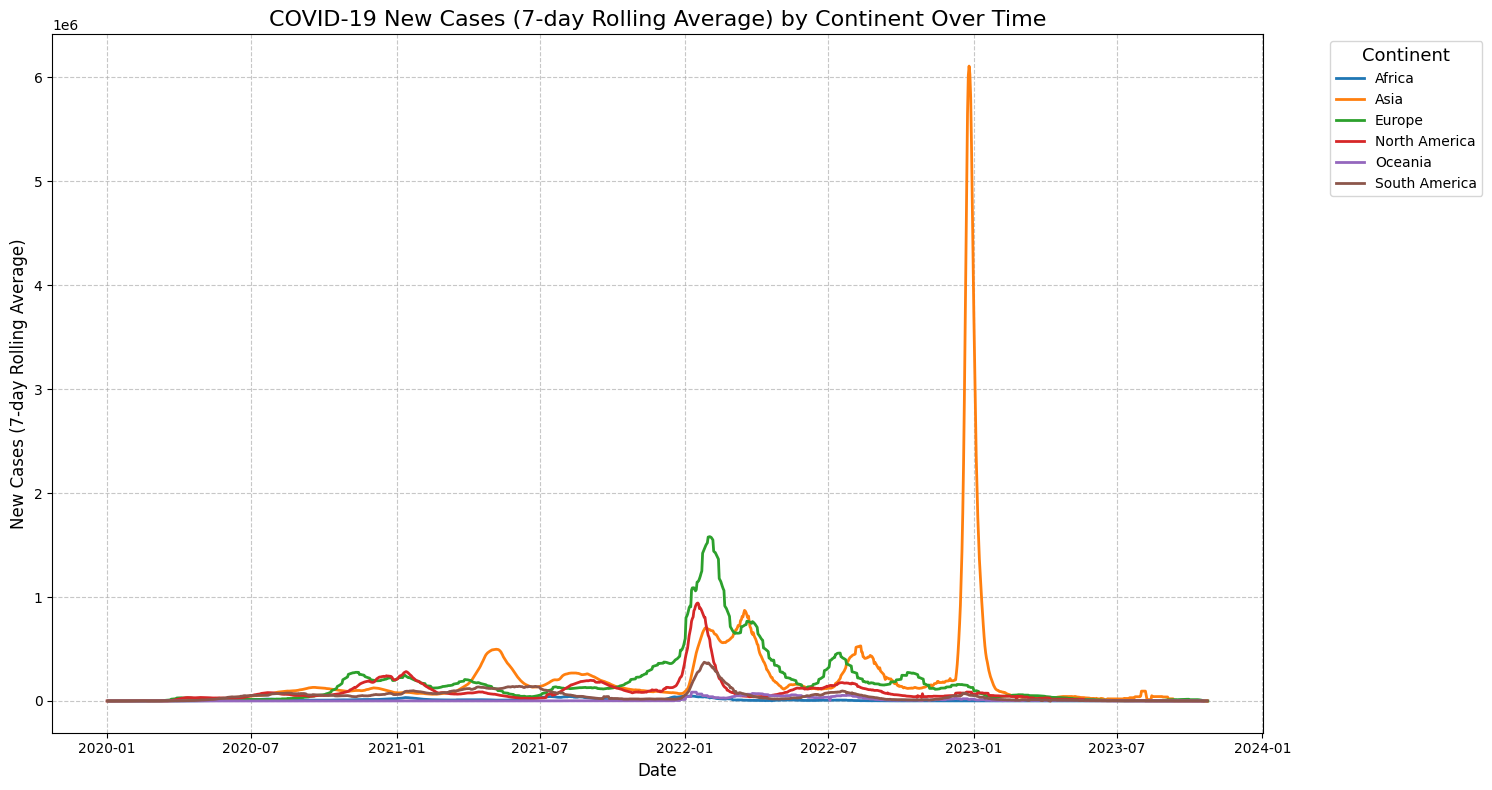

In [42]:
continent_daily_cases = df.groupby(['continent', 'date'])['new_cases'].sum().reset_index()

continent_daily_cases['new_cases_rolling_avg'] = continent_daily_cases.groupby('continent')['new_cases'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=continent_daily_cases,
    x='date',
    y='new_cases_rolling_avg',
    hue='continent',
    palette='tab10',
    linewidth=2
)

plt.title('COVID-19 New Cases (7-day Rolling Average) by Continent Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases (7-day Rolling Average)', fontsize=12)
plt.legend(title='Continent', title_fontsize='13', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

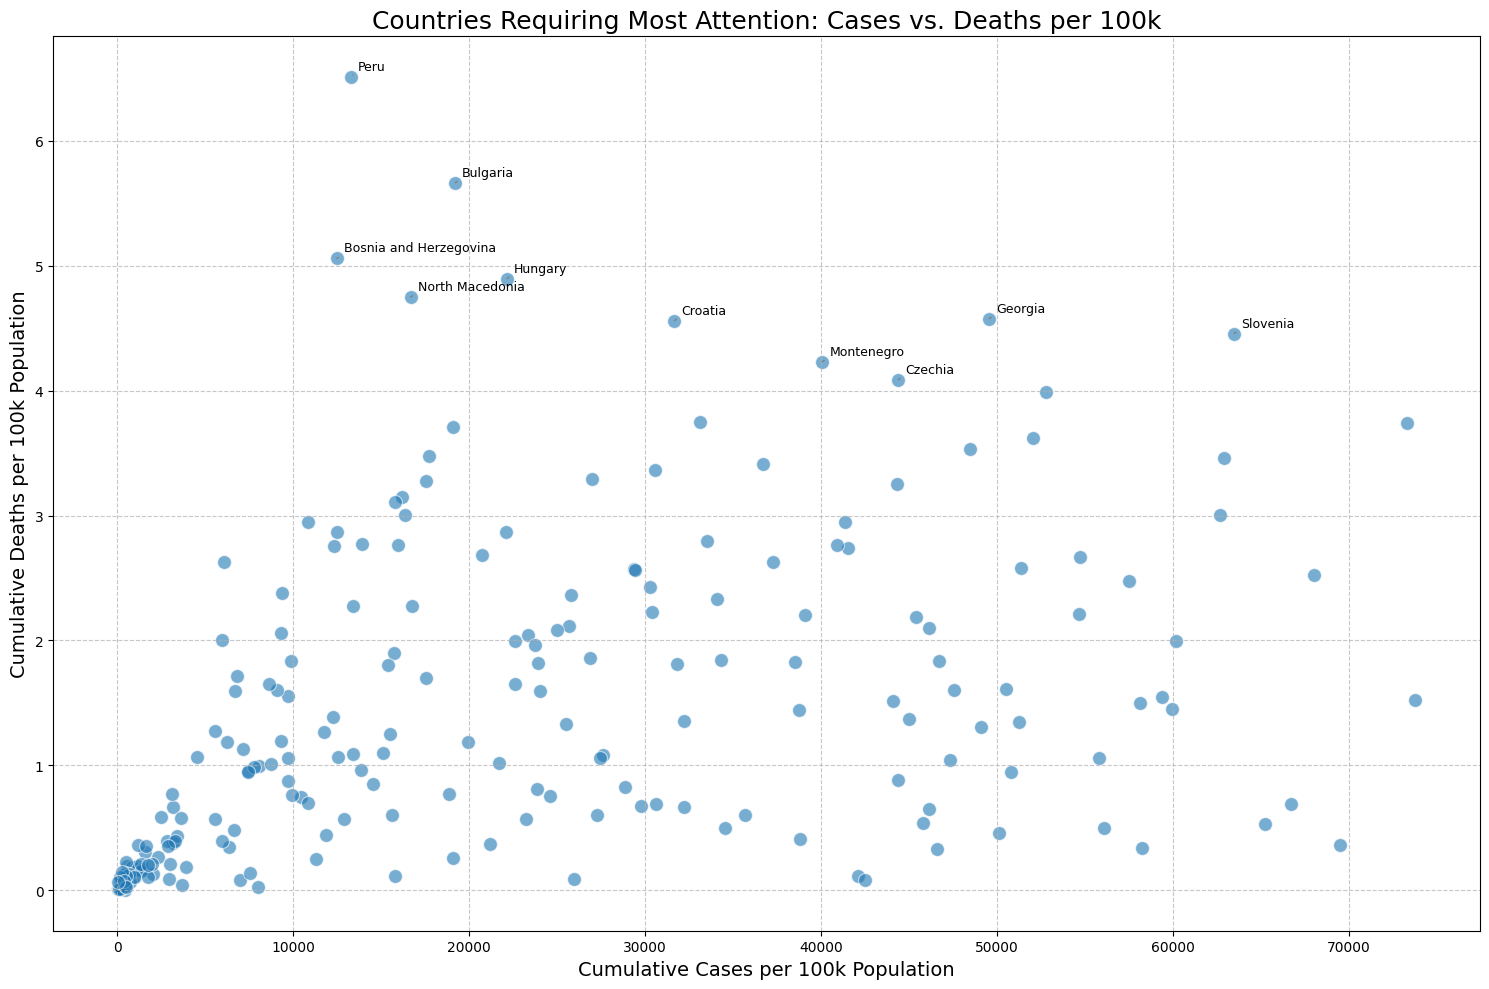

In [43]:
prominent_countries_for_attention = top_countries_mortality.index.tolist()

plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=country_prevalence_mortality,
    x='cases_per_100k',
    y='deaths_per_100k',
    alpha=0.6, # Reduced alpha slightly for potential overlap visibility, though 0.7 was also fine
    s=100 # Increase point size for better visibility
)

# Annotate prominent countries
for country_name in prominent_countries_for_attention:
    country_data = country_prevalence_mortality[country_prevalence_mortality['location'] == country_name]
    if not country_data.empty:
        x = country_data['cases_per_100k'].iloc[0]
        y = country_data['deaths_per_100k'].iloc[0]
        plt.annotate(
            country_name,
            (x, y),
            textcoords="offset points",
            xytext=(5, 5), # Offset the text slightly from the point
            ha='left',
            fontsize=9,
            arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0.2', color='gray')
        )

plt.title('Countries Requiring Most Attention: Cases vs. Deaths per 100k', fontsize=18)
plt.xlabel('Cumulative Cases per 100k Population', fontsize=14)
plt.ylabel('Cumulative Deaths per 100k Population', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Final Analysis:

### Questions:

1.  **How did global COVID-19 cases grow over time, and what major waves were observed?**
    The global trend showed a significant peak in new cases in January 2023, reaching approximately 25 million cases globally. An earlier prominent wave occurred from January to February 2022, peaking at about 15 million cases. Multiple distinct waves were visible throughout the pandemic period.

2.  **What were the key differences in COVID-19 case growth trends among selected countries (United States, India, Brazil, United Kingdom, South Africa)?**
    The selected countries exhibited varied trends. India experienced a very sharp and intense wave in mid-2021, distinct from others. The United States and the United Kingdom often showed similar timing in their major waves. Intensity of outbreaks also differed, with the United States and India generally recording higher absolute numbers of new cases during peaks. The duration of waves varied, with some countries like India having sharper, shorter peaks, while others like the United States and United Kingdom experienced more prolonged periods of high case numbers.

3.  **Which countries showed the highest COVID-19 prevalence (cumulative cases per 100k population)?**
    A bar chart was generated identifying the top 10 countries by cumulative cases per 100k population. While specific country names and numbers are not explicitly listed in the provided summary, the visualization effectively highlighted nations with the highest prevalence rates.

4.  **Which countries experienced disproportionately high COVID-19 mortality (cumulative deaths per 100k population)?**
    Countries such as Peru, Bulgaria, and Bosnia and Herzegovina showed significantly higher cumulative deaths per 100k population. The top 10 list also included a notable concentration of countries from Eastern Europe (Bulgaria, Bosnia and Herzegovina, Hungary, North Macedonia, Georgia, Croatia, Slovenia, Montenegro, Czechia), alongside Peru from South America.

5.  **What is the relationship between COVID-19 prevalence and mortality at a country level, and which countries require the most attention?**
    A scatter plot comparing cumulative cases per 100k against cumulative deaths per 100k population for individual countries was generated. This plot allowed for the identification of outliers and specific patterns, highlighting countries with both high prevalence and high mortality. Specifically, countries identified as having the highest mortality rates (e.g., Peru, Bulgaria, Bosnia and Herzegovina, and other Eastern European nations) were flagged as requiring the most attention due to their elevated death tolls relative to their populations and case counts.

6.  **How did COVID-19 case trends vary across continents over time?**
    A line plot showing the 7-day rolling average of new cases for each continent over time was generated. This visualization enabled a comparison of the timing and magnitude of pandemic waves across different regions, illustrating the diverse progression of the pandemic globally.

### Data Analysis Key Findings

*   **Global Pandemic Waves**: The global COVID-19 new cases peaked around 25 million in January 2023, following an earlier significant wave of approximately 15 million cases between January and February 2022.
*   **Diverse Country-Specific Trends**: Individual countries like India experienced distinct, intense waves (e.g., mid-2021), contrasting with more prolonged periods of high case numbers seen in the United States and United Kingdom during certain phases.
*   **High Mortality Regions**: Countries such as Peru, Bulgaria, and Bosnia and Herzegovina exhibited significantly higher cumulative COVID-19 deaths per 100k population compared to other nations, with a notable concentration of high mortality rates observed in Eastern European countries.
*   **Prevalence and Mortality Relationship**: The analysis revealed varying relationships between cumulative cases and deaths per 100k across countries, with certain nations displaying both high prevalence and high mortality rates, indicating a severe impact.
